In [2]:
import numpy as np
import scipy.stats
import math
N=100
samps = []
for i in range(N):
    samps.append(np.random.normal(5,1))

    
def posterior(xs,theta):
    post = 1
    for x in xs:
        post*= scipy.stats.norm(theta, 1).pdf(x)
        
    return post 
import matplotlib.pyplot as plt


rr = np.arange(4, 6, 0.1)
def y(x,xs):
    return np.array([posterior(xs,t) for t in x])
post = y(rr,samps).astype(np.float)


plt.plot(rr, post)



plt.show()


p = np.array([posterior(samps,s) for s in rr])
p = p/(np.sum(p))

simulated =[]
for i in range(500):

    xi = np.random.choice(rr, p=p)
#     print(xi)
    simulated.append(xi)
sim = y(rr,simulated).astype(np.float)
# print(sim)
plt.plot(rr, sim)


plt.show()



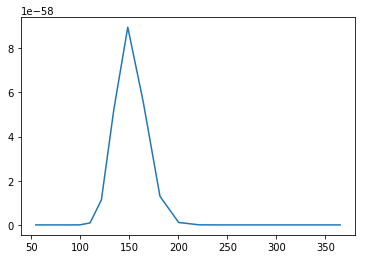

In [3]:
N=100
samps = []
for i in range(N):
    samps.append(np.random.normal(5,1))

    
def posterior(xs,theta):
    post = 1
    for x in xs:
        post*= scipy.stats.norm(theta, 1).pdf(x)
        
    return post 
import matplotlib.pyplot as plt


rr = np.arange(4, 6, 0.1)
def y(x,xs):
    return np.array([posterior(xs,t) for t in x])
post = y(rr,samps).astype(np.float)


plt.plot(np.exp(rr), post)



plt.show()




In [4]:
theta_samples = np.exp(rr)
probs = [posterior(samps,t) for t in rr]
probs = probs/np.sum(probs)
theta =  np.mean([theta_samples[i] * probs[i] for i in range(len(probs))])
# print(theta)
V =  np.mean([(theta_samples[i]-theta)*(theta_samples[i]-theta) * probs[i] for i in range(len(probs))])

se = np.sqrt(V)
# print(se)
a = theta + se * 2.17009
b = theta - se * 2.17009
print("97% confidence interval (",b,",",a,")")


a = theta + se * 1.81
b = theta - se * 1.81
print("93% confidence interval (",b,",",a,")")

97% confidence interval ( -61.88483753233056 , 76.84934247091029 )
93% confidence interval ( -50.37453361005844 , 65.33903854863817 )
